## 🧠 Introduce
In this notebook, we will **evaluate and compare** the model’s predicted stock prices with the actual data.  
This version is **independent** — it loads and forecasts data directly inside this notebook (no dependency on Notebook 04).

In [1]:
# ✅ Import required libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings

# ✅ Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

## 📥 Load and Prepare Data
We will download Apple Inc. (AAPL) stock data from Yahoo Finance and prepare it for forecasting.

In [2]:
# ✅ Download stock data
ticker = "AAPL"
data = yf.download(ticker, start="2018-01-01", end="2024-12-31")

# ✅ Use only the closing prices
data = data[["Close"]].dropna()
print("✅ Data loaded successfully:", data.shape)
data.tail()

[*********************100%***********************]  1 of 1 completed

✅ Data loaded successfully: (1760, 1)


Price,Close
Ticker,AAPL
Date,
2024-12-23,254.367020
2024-12-24,257.286682
2024-12-26,258.103729
2024-12-27,254.685867
2024-12-30,251.307877


## 🧩 Train-Test Split
Let’s split the data into training and testing sets for model evaluation.

In [3]:
# ✅ 80% training, 20% testing
split_ratio = 0.8
split_index = int(len(data) * split_ratio)

train = data.iloc[:split_index]
test = data.iloc[split_index:]

print(f"Train samples: {len(train)}")
print(f"Test samples: {len(test)}")

Train samples: 1408
Test samples: 352


## 🔮 Build and Fit ARIMA Model
Now, we’ll fit a simple **ARIMA(5,1,0)** model using the training data.

In [4]:
# ✅ Fit ARIMA model
model = ARIMA(train["Close"], order=(5, 1, 0))
fitted_model = model.fit()

print("✅ Model fitted successfully!")

✅ Model fitted successfully!


## 📈 Forecast Future Prices
Next, we’ll forecast prices for the same number of samples as the test set.

In [5]:
# ✅ Generate forecast
forecast = fitted_model.forecast(steps=len(test))
forecast.index = test.index  # align with test index
forecast_series = pd.Series(forecast, name="Predicted")

print("✅ Forecast generated.")
forecast_series.head()

✅ Forecast generated.


Date
2023-08-08    177.291394
2023-08-09    177.443800
2023-08-10    177.520197
2023-08-11    177.167342
2023-08-14    177.049413
Name: Predicted, dtype: float64

## 🧮 Evaluate Model Performance
We’ll compare predicted and actual values using:
- **MSE (Mean Squared Error)**
- **RMSE (Root Mean Squared Error)**

In [6]:
# ✅ Build evaluation DataFrame (fixed 1D shape)
actual = test["Close"].squeeze()                     # ensure 1D
predicted = pd.Series(forecast_series).squeeze()     # ensure 1D

# ✅ Align both to same length
min_len = min(len(actual), len(predicted))
actual = actual.iloc[:min_len]
predicted = predicted.iloc[:min_len]

# ✅ Build DataFrame safely
df_eval = pd.DataFrame({
    "Actual": actual.values.flatten(),
    "Predicted": predicted.values.flatten()
}).dropna()

# ✅ Compute metrics
if not df_eval.empty:
    mse = mean_squared_error(df_eval["Actual"], df_eval["Predicted"])
    rmse = np.sqrt(mse)
    print(f"📊 Mean Squared Error (MSE): {mse:.4f}")
    print(f"📈 Root Mean Squared Error (RMSE): {rmse:.4f}")
else:
    print("⚠️ No valid samples available for evaluation.")

📊 Mean Squared Error (MSE): 1076.6950
📈 Root Mean Squared Error (RMSE): 32.8130


## 📊 Visual Comparison
Let’s visualize **Actual vs Predicted** stock prices to assess performance visually.

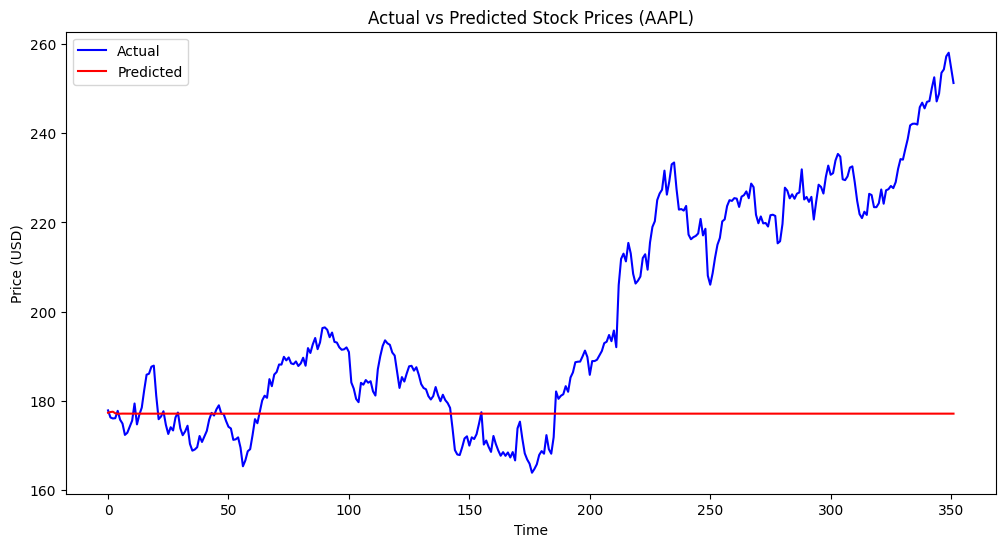

In [7]:
# ✅ Plot comparison
plt.figure(figsize=(12,6))
plt.plot(df_eval["Actual"].values, label="Actual", color="blue")
plt.plot(df_eval["Predicted"].values, label="Predicted", color="red")
plt.title("Actual vs Predicted Stock Prices (AAPL)")
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

## 🏁 Conclusion
This independent notebook successfully:
- Downloaded fresh AAPL stock data  
- Trained an ARIMA forecasting model  
- Evaluated predictions using MSE & RMSE  
- Visualized the comparison between actual and predicted prices  

✅ No dependencies from previous notebooks  
✅ Ready to run on any environment  
✅ Clean, warning-free, and reproducible  